# Visualising molecules and computing properties in RDKit

In [1]:
#Import useful modules:

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdmolops
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors as rdmd
from rdkit.Chem import rdDepictor
from rdkit.Chem import PandasTools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


Visualise a single molecule:

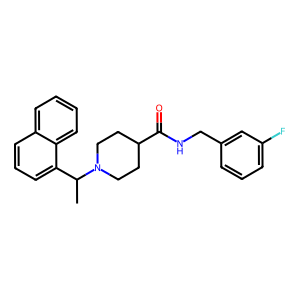

In [2]:
q= Chem.MolFromSmiles("Fc8cccc(c8)CNC(=O)C3CCN(C(c1c2ccccc2ccc1)C)CC3")
Draw.MolToImage(q)

Or simply:

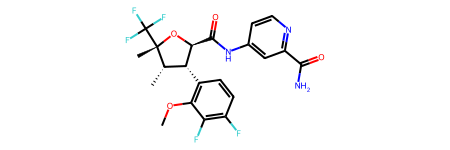

In [3]:
Chem.MolFromSmiles("C[C@H]1[C@H]([C@@H](O[C@@]1(C)C(F)(F)F)C(=O)NC2=CC(=NC=C2)C(=O)N)C3=C(C(=C(C=C3)F)F)OC")

Compute some commonly used molecular descriptors:

In [4]:
x1 = Chem.MolFromSmiles('C[C@H]1[C@H]([C@@H](O[C@@]1(C)C(F)(F)F)C(=O)NC2=CC(=NC=C2)C(=O)N)C3=C(C(=C(C=C3)F)F)OC')

print('Mol-Wt:', Descriptors.ExactMolWt(x1))
print('TPSA:', Descriptors.TPSA(x1))
print('LogP:', Descriptors.MolLogP(x1))
print('Rot_bonds:', Descriptors.NumRotatableBonds(x1)) #without hydrogens is the valid count for RB
print('HBA:', Descriptors.NumHAcceptors(x1))
print('HBD:', Descriptors.NumHDonors(x1))

Mol-Wt: 473.13739721999997
TPSA: 103.53999999999999
LogP: 3.5455000000000014
Rot_bonds: 5
HBA: 5
HBD: 2


Now, we will compute all descriptors that can be calculated in RDKit. This can be very useful for model building and molecule filtering:

In [5]:
descrs = Descriptors.CalcMolDescriptors(x1)

print(f"This returns around {len(descrs)} descriptors, inside a {type(descrs)}")

This returns around 210 descriptors, inside a <class 'dict'>


The dictionary in return could be converted into a Pandas dataframe:

In [6]:
#Display top 3 items:
pd.DataFrame(descrs.items()).head(3)

,0,1
0,MaxAbsEStateIndex,14.350342
1,MaxEStateIndex,14.350342
2,MinAbsEStateIndex,0.024691


However, most of the times, we wish to compute descriptors inside a dataframe for a bunch of molecules.

So here's how we do this:

In [15]:
# Import a sample dataframe containing SMILES molecules:

data = pd.read_csv("data/CS12_combined.csv")
print(f"The dataframe contains {data.shape[0]} molecules")
data.head(3)

The dataframe contains 999 molecules


,ID,SMILES,QED,Retrosynthesis Score,Retrosynthesis Steps
0,1,CCCc1ncnc(-c2ccc(C(=O)N3CCN(C(C)CC)CC3)c(F)c2)...,0.511405,0.6,5.0
1,2,CCc1ncnc(-c2ccc(C(=O)N3CCN(C(C)C)CC3)c(F)c2)c1...,0.585936,0.2,2.0
2,3,CC(C)Cc1ncnc(-c2ccc(C(=O)N3CCN(C(C)C)CC3)c(F)c...,0.532574,0.6,7.0
